# [TP INFO] Développement d’approches neuronales



> Author: Zixuan WANG



>[[TP INFO] Développement d’approches neuronales](#scrollTo=7HQCz-feIluh)

>>[Partie 1. Classification de documents](#scrollTo=K4DslONUIqTO)

>>>>>[Q1. Chargez les données d’apprentissage](#scrollTo=Pkguyx0BIuIR)

>>>[Perceptron multicouche avec une représentation pré-calculée](#scrollTo=2kvwmJ0yIz9h)

>>>>[Préparation des données](#scrollTo=uXrQW3nmI_ZG)

>>>>>[Q2. Reprendre la fonction du TP 2 qui calcule la moyenne](#scrollTo=ixJcejaHI_bR)

>>>>>[Q3. En utilisant cette fonction et en vous inspirant des instructions](#scrollTo=c_hPBJKDI_dU)

>>>>>[Q4. A partir du Dataset pour les données d’apprentissage](#scrollTo=nEMs8xPRI_fQ)

>>>>[Définition du modèle](#scrollTo=ieFEUtUDI_jX)

>>>>>[Q5. Définissez un premier modèle mlp1 à partir de cet exemple](#scrollTo=ncRc9wb_Jnrw)

>>>>[Estimation des paramètres](#scrollTo=2pA_4hvvJnuB)

>>>>>[Q6. Lancez l’apprentissage sur les données préparées](#scrollTo=gcu88y_VJnwX)

>>>>>[Q7. Regardez la précision sur les données de validation](#scrollTo=i-UNZmBVJnyr)

>>>>>[Q8. Evaluez le modèle précédemment créé sur les données de test](#scrollTo=u1JkmarSJn03)

>>>>>[Q9. La prédiction fait une erreur de classification flagrante](#scrollTo=6JieL6B3Jn3E)

>>>[LSTM avec apprentissage de représentation](#scrollTo=ibp0z8JDKT-P)

>>>>[Définition du vocabulaire](#scrollTo=YsSYOsvqKUAN)

>>>>>[Q10. Ecrire une fonction normalize doc()](#scrollTo=UyMRsqnYKUCJ)

>>>>>[Q11. En utilisant la normalisation ci-dessus](#scrollTo=K93ROouUKUEm)

>>>>>[Q12. Avec les 10000 tokens les plus fréquents une table de hashage](#scrollTo=X68LnQzqKUGk)

>>>>[Création des Dataset](#scrollTo=JNezHx-MKUIZ)

>>>>>[Q13. Regardez rapidement la longueur des séquences normalisées](#scrollTo=miV2V2_lKUKY)

>>>>>[Q14. Fonction qui prend en entrée une séquence normalisée de tokens](#scrollTo=pKVQL65CK5jl)

>>>>>[Q15. En adaptant ce que vous avez vu dans la première partie](#scrollTo=aIkPrLmKK5np)

>>>>>[Q16. Vérifiez sur quelques échantillons des données d’apprentissage](#scrollTo=V3DkWcHaK5pk)

>>>>[Défintion du modèle](#scrollTo=9ekw1lS6La3V)

>>>>>[Q17. Créez un premier modèle à partir de l’exemple ci-dessus](#scrollTo=8MrqwlIxK5rP)

>>>>>[Q18. Lancez l’estimation des paramètres de votre modèle](#scrollTo=aa9G0uLWK5uY)

>>>>>[Q19. Evaluez ces performances sur les données de test](#scrollTo=Q7k0RnloLQ56)

>>>[Adaptation à la tâche d’un modèle BERT](#scrollTo=X2rTY9fNLQ-o)

>>>>[Préparation des données](#scrollTo=hiKHZcTvLwap)

>>>>>[Q20. Créer la liste des textes au format ci-dessus pour l’apprentissage](#scrollTo=Q3cQjPSwLwcr)

>>>>>[Q21. Créer les Dataset correspondant aux données d’apprentissage](#scrollTo=bzm7hDWu2noh)

>>>>[Chargement du modèle et apprentissage](#scrollTo=65GmMsoYMBA3)

>>>>>[Q20. Regarder sa structure ainsi que le nombre de paramètres](#scrollTo=ehtwpC9lLwhM)

>>>>>[Q21. Lancer l’adaptation du modèle sur une ou deux itérations](#scrollTo=t6Cc3skSLwjR)

>>>>>[Q22. Evaluer enfin la performance du modèle sur les données de test](#scrollTo=8SCZjyQeLwlT)

>>[Partie 2. Etiquetage de séquences](#scrollTo=Q3D0OX4xMRCx)

>>>>>[Q23. Regardez le format et la signification des différentes colonnes](#scrollTo=-JZ2WuJqMRLF)

>>>>>[Q24. Ecrire une fonction qui lit un fichier et stock en mémoire les tokens](#scrollTo=b6mrgWZiZl_f)

>>>>>[Q25. Transformez les données de manière à pouvoir les utiliser](#scrollTo=l_mrI8MkMRUh)

>>>>>[Q26. Créez le modèle ner1 et lancez l’estimation des paramètres](#scrollTo=TCc8rFGRMRZK)

>>>>>[Q27. Décodez avec ce modèle les données de test de manière](#scrollTo=uIhOil4hMRee)

>>>>>[Q28. Pourquoi ne peut-on pas utiliser directement la fonction evaluate](#scrollTo=Q8Nal6o1MRqd)

>>>>>[Q29. Ecrivez une fonction qui calcul pour chacune des étiquettes](#scrollTo=EgLSEZTXMbdb)



## Partie 1. Classification de documents

##### Q1. Chargez les données d’apprentissage

We add a function **getpreferredencoding** here, because when I use the CPU Hardware accelerator in colab there exists an error that the time did't match.


In [ ]:
import numpy as np
import json
import spacy
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import locale
from keras.models import load_model
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

As my notebook always crash when I try to analyze the whole dataset, I change to use the small version of it.

In [ ]:
# download data (first time)
! wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn-small.json
! wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst-small.json

# si besoin -- la première fois ou en cas de réinitialisation du notebook 
!python -m spacy download en_core_web_md

--2023-03-17 08:18:38--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-trn-small.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13392254 (13M) [application/json]
Saving to: ‘imdb-trn-small.json’

imdb-trn-small.json 100%[===================>]  12.77M  5.89MB/s    in 2.2s    

2023-03-17 08:18:42 (5.89 MB/s) - ‘imdb-trn-small.json’ saved [13392254/13392254]

--2023-03-17 08:18:42--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/imdb-tst-small.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5122074 (4.9M) [application/json]
Saving to: ‘imdb-tst-small.json’

imdb-tst-small.json 100%[===================>]   4.88M  3.37MB/s    in 1.4s    

202

In [ ]:
with open('imdb-trn-small.json', 'r') as f:
  train_data = json.load(f)

with open('imdb-tst-small.json', 'r') as f:
  test_data = json.load(f)

nlp = spacy.load('en_core_web_md', disable=["parser", "ner"])
vocab = nlp.vocab
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7f7bf830ce20>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7f7bf830cd00>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7f7bf82676c0>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7f7bf8235ac0>)]


We define the **_text & _label** variables here to help us in the following deeper analysis.

In [ ]:
train_text = [x[1] for x in train_data]
train_label = [x[0] for x in train_data]
train_doc = []

test_text = [x[1] for x in test_data]
test_label = [x[0] for x in test_data]
test_doc = []

We use spaCy to perform **morphosyntactic tokeniaztion** and labeling on the text data and stores the result in a list of spaCy Doc objects. The processed training and test data are saved in pickle files and can be loaded back into memory.

In [ ]:
for doc in nlp.pipe(train_text, disable=["parser", "ner"]):
  train_doc.append(doc)

# Save the trained model to a file
with open('train_doc.pickle', 'wb') as f:
    pickle.dump(train_doc, f)

print(len(train_doc))

10000


In [ ]:
for doc in nlp.pipe(test_text, disable=["parser", "ner"]):
  test_doc.append(doc)

# Save the processed test data
with open('test_doc.pickle', 'wb') as f:
    pickle.dump(test_doc, f)

print(len(test_doc))

4000


In [ ]:
# Load the train_doc file
with open('train_doc.pickle', 'rb') as f:
    train_doc = pickle.load(f)

In [ ]:
for token in train_doc[0]:
    print(token.text, token.pos_)

For ADP
a DET
movie NOUN
that PRON
gets VERB
no DET
respect NOUN
there ADV
sure ADV
are AUX
a DET
lot NOUN
of ADP
memorable ADJ
quotes NOUN
listed VERB
for ADP
this DET
gem NOUN
. PUNCT
Imagine VERB
a DET
movie NOUN
where SCONJ
Joe PROPN
Piscopo PROPN
is AUX
actually ADV
funny ADJ
! PUNCT
Maureen PROPN
Stapleton PROPN
is AUX
a DET
scene NOUN
stealer NOUN
. PUNCT
The DET
Moroni PROPN
character NOUN
is AUX
an DET
absolute ADJ
scream NOUN
. PUNCT
Watch VERB
for ADP
Alan PROPN
" PUNCT
The DET
Skipper PROPN
" PUNCT
Hale PROPN
jr PROPN
. PROPN
as ADP
a DET
police NOUN
Sgt PROPN
. PUNCT


In [ ]:
with open('test_doc.pickle', 'rb') as f:
    test_doc = pickle.load(f)

### Perceptron multicouche avec une représentation pré-calculée

#### Préparation des données

##### Q2. Reprendre la fonction du TP 2 qui calcule la moyenne

Here list 3 functions we have seen in TP2 as an instruction for our function creation.

In [ ]:
dim = 300

# fonction qui prend en entrée un document et qui renvoie l'embedding moyen des tokens
# dans le document : version basique sans aucun filtrage
def average_word_embeding_basic(doc):
  '''
  Fait la moyenne des plongements des tokens dans le doc retourné par spaCy. On suppose que l'on connaît
  la dimension des plongements (ici 300). Il s'agit d'une première version très basique que l'on va raffiner
  par la suite : on ne s'embête pas ici avec les types de tokens, les étiquettes, etc.
  '''
  global vocab
  global dim
  sum = np.zeros(dim, dtype='float32')

  n = 0
  for tok in doc:
    if tok.has_vector: 
      sum += tok.vector
      n += 1
  if n != 0:
    sum  = sum / np.float32(n)
        
  return sum
  
average_word_embeding_basic(train_doc[0])

array([-1.8436018e+00,  7.3315823e-01, -9.9850094e-01, -6.6751075e-01,
        3.8003907e+00, -5.0251609e-01,  1.2603183e+00,  2.3086507e+00,
        1.8454519e-01, -9.1533500e-01,  5.5110312e+00,  1.5100710e-01,
       -1.6765226e+00,  3.4406510e-01,  8.2289505e-01,  1.2350460e+00,
        1.7567827e+00,  5.0225610e-01,  3.5459173e-01, -2.2598150e-01,
        9.2105603e-01, -5.7917345e-01, -7.2479612e-01, -9.9524564e-01,
       -8.4950894e-01, -1.4638330e+00, -1.2144116e+00, -1.4925059e+00,
        8.4992625e-02,  2.9159397e-01, -2.1972942e-01, -9.4150566e-02,
       -1.0260384e+00, -2.9980725e-01, -2.3817949e+00,  7.3067272e-01,
       -5.2185303e-01,  8.8640831e-02,  2.5489378e+00,  1.2725471e-01,
       -8.2916653e-01, -1.9318250e-01, -3.5453203e-01, -4.8690841e-01,
       -1.1544628e+00,  1.1816539e+00,  2.8880161e-01, -2.6951480e+00,
       -8.2295650e-01,  1.6955924e+00, -4.3604231e-01,  8.9756596e-01,
        1.6200231e+00, -3.0805957e+00, -3.5371360e-01, -3.4500712e-01,
      

In [ ]:
# fonction qui prend en entrée un document et qui renvoie l'embedding moyen des tokens
# dans le document : version qui rajoute un filtrage sur les termes de manière à ne 
# regarder que les termes les plus pertinents pour la classification.

def average_word_embeding_filter(doc, keep = ('VERB', 'NOUN', 'ADJ')):
  global vocab
  global dim
  sum = np.zeros(dim, dtype='float32')

  n = 0
  for tok in doc:
    if keep != None and tok.pos_ not in keep: continue
    if tok.has_vector: 
      sum += tok.vector
      n += 1
  if n != 0:
    sum  = sum / np.float32(n)      
  return sum
  
# pour tester que la fonction renvoie bien un résultat
average_word_embeding_filter(train_doc[0])

array([ 8.75644311e-02, -3.85223925e-01, -1.36298168e+00, -2.45676804e+00,
        2.24111485e-03,  3.01097274e-01,  2.79398227e+00,  1.56140840e+00,
       -1.16360152e+00, -8.05362999e-01,  3.18884993e+00,  5.43962955e-01,
       -1.30644405e+00,  1.23481476e+00,  1.41641963e+00, -6.50991678e-01,
        2.18918705e+00, -3.65496993e-01,  4.55553800e-01,  8.32791090e-01,
        5.76915801e-01,  1.20761108e+00, -3.09641629e-01, -2.63332725e+00,
       -6.33858144e-01,  5.00759065e-01, -1.45968604e+00, -1.07974935e+00,
        9.16799963e-01,  1.03768671e+00,  9.37177777e-01,  9.41058278e-01,
       -9.07994509e-02, -4.00692634e-02, -1.87094390e-01,  3.05388868e-01,
       -1.37269783e+00,  1.54670668e+00,  1.76749468e+00,  8.09437752e-01,
       -1.39400911e+00, -7.25377262e-01,  3.62697035e-01,  2.77931362e-01,
       -4.23286140e-01,  5.96153915e-01, -2.60208875e-01, -3.00898600e+00,
        8.66840184e-01,  2.19612885e+00,  6.13005221e-01,  4.32005338e-02,
        1.58098984e+00, -

In [ ]:
# fonction qui prend en entrée un document et qui renvoie l'embedding moyen des lemmes 
# des tokens dont l'étiquette morpho-syntaxique est dans la liste.

def average_lemma_embeding_filter(doc, keep = ('VERB', 'NOUN', 'ADJ')):
  global vocab
  global dim
  sum = np.zeros(dim, dtype='float32')

  n = 0
  for tok in doc:
    if keep != None and tok.pos_ not in keep: continue # on ne regarde pas ces tokens
    lemma = tok.lemma_

    # on vérifie que le lemme a bien un embeddig associé : si oui, on l'ajoute à sum
    if vocab[lemma].has_vector:
      sum += vocab[lemma].vector
      n += 1

  if n != 0:
    sum  = sum / np.float32(n)     
  return sum

average_lemma_embeding_filter(train_doc[0])

array([-0.0612816 , -0.15433544, -1.3828589 , -2.6882365 , -0.75250655,
        0.29456112,  3.1450353 ,  2.199098  , -1.5048821 , -0.5641116 ,
        3.597828  ,  0.7744183 , -1.5579568 ,  1.2784833 ,  1.6163602 ,
       -0.79037094,  2.1582956 , -1.0801116 ,  0.14334093,  0.80162615,
        0.42869887,  1.1151004 , -0.12280604, -2.7754872 , -0.75611424,
        1.120158  , -2.2037113 , -1.143796  ,  0.39938655,  1.5680209 ,
        1.1335416 ,  0.71361506, -0.15522726, -0.05469682,  0.5740161 ,
        0.06589221, -1.1843606 ,  1.178195  ,  1.9855608 ,  1.4772078 ,
       -1.9601773 , -0.40878895,  1.1496682 ,  0.09655185,  0.18629   ,
        0.59669334, -0.36118942, -3.416911  ,  0.18856737,  2.148205  ,
        0.44027293,  0.10607278,  1.528826  , -2.4664466 , -1.5454043 ,
        0.6884404 , -0.03422496,  0.5212719 ,  2.1378386 ,  1.4178168 ,
        0.6062953 , -0.04674666, -2.2396655 , -1.0015079 ,  0.17156947,
        2.5565057 , -4.1423016 , -2.7978828 , -0.59299386,  2.11

Here we define our **get_doc_embedding funtion** to encode a document as a single vector using the pretrained word embeddings.

We define the variable embeddings to get the word embeddings for all the verbs and adjectives in the docuemnt. And convert the pos/neg label to a **one-hot emcoded array**.

In [ ]:
def get_doc_embedding(sample):
    """
    Encode a document as a single vector using the pretrained word embeddings
    
    :param sample: A tuple containing the label and the spaCy document
    :return: A tuple of numpy arrays representing the document embedding and the label
    """
    label, doc = sample
    # Get the word embeddings for all the verbs and adjectives in the document
    embeddings = [token.vector for token in doc if (token.pos_ in ['VERB', 'ADJ'])]
    
    # Compute the document embedding as the mean of the token embeddings
    if embeddings:
        doc_embedding = np.mean(embeddings, axis=0)
    else:
        doc_embedding = np.zeros((300,))
    
    # Convert the label to a one-hot encoded array
    if label == 'pos':
        doc_label = np.array([0, 1], dtype='int32')  # positive label
    else:
        doc_label = np.array([1, 0], dtype='int32')  # negative label
    
    return doc_embedding, doc_label

##### Q3. En utilisant cette fonction et en vous inspirant des instructions

Here we use the function we just defined to create two dataset, one for training and one for test. The init info is shown as below, and the first 5 dataset records are printed to verify.

In [ ]:
nsamples = 10000 # number of documents
dim = 300 # embedding dimension

# Create arrays to hold the embeddings and labels
data = np.empty((nsamples, dim), dtype='float32')
label = np.empty((nsamples, 2), dtype='int32')

In [ ]:
# loop through each document in the training set
for i, (doc, doc_label) in enumerate(zip(train_doc, train_label)):
    # compute the document embedding and label using the function from Q2
    doc_embedding, doc_label = get_doc_embedding((doc_label, doc))
    
    # add the document embedding to the data array
    data[i] = doc_embedding
    
    # add the label to the label array
    label[i] = doc_label

# Create a TensorFlow dataset for the training data
ds = tf.data.Dataset.from_tensor_slices((data, label))

# Print some information about the datasets
print("Training dataset:")
print(ds)
print(ds.element_spec)
print(ds.cardinality().numpy())

Training dataset:
<TensorSliceDataset element_spec=(TensorSpec(shape=(300,), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
(TensorSpec(shape=(300,), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.int32, name=None))
10000


In [ ]:
nsamples = 4000 # number of documents
dim = 300 # embedding dimension

# Create arrays to hold the embeddings and labels
data_tst = np.empty((nsamples, dim), dtype='float32')
label_tst = np.empty((nsamples, 2), dtype='int32')

# loop through each document in the training set
for i, (doc, doc_label) in enumerate(zip(test_doc, test_label)):
    # compute the document embedding and label using the function from Q2
    doc_embedding, doc_label = get_doc_embedding((doc_label, doc))
    
    # add the document embedding to the data array
    data_tst[i] = doc_embedding
    
    # add the label to the label array
    label_tst[i] = doc_label

# Create a TensorFlow dataset for the training data
ds_tst = tf.data.Dataset.from_tensor_slices((data_tst, label_tst))

# Print some information about the datasets
print("Training dataset:")
print(ds_tst)
print(ds_tst.element_spec)
print(ds_tst.cardinality().numpy())

Training dataset:
<TensorSliceDataset element_spec=(TensorSpec(shape=(300,), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.int32, name=None))>
(TensorSpec(shape=(300,), dtype=tf.float32, name=None), TensorSpec(shape=(2,), dtype=tf.int32, name=None))
4000


In [ ]:
for record in ds.take(5):
    print(record)

(<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([ 7.62149990e-01, -7.32337296e-01, -5.91071062e-02, -1.76632416e+00,
        1.48453581e+00,  1.60980296e+00,  1.33228278e+00,  1.46802139e+00,
       -1.29307997e+00, -1.05451429e+00,  3.46732879e+00,  4.86122780e-02,
       -1.71594882e+00,  1.11312640e+00,  1.97438562e+00, -2.28028633e-02,
        1.54312003e+00, -3.51442486e-01,  5.03906608e-01, -2.08497167e-01,
       -1.93350166e-02,  2.08984300e-01,  1.02344275e-01, -1.78350425e+00,
       -6.90099120e-01,  3.84239972e-01, -4.41065729e-01, -4.69574302e-01,
        1.52323020e+00,  1.82716715e+00,  1.46995854e+00,  1.02438581e+00,
        3.39500308e-02, -9.80641901e-01, -1.15872823e-01,  2.68111438e-01,
       -4.22660023e-01,  1.18785727e+00,  2.02837276e+00,  2.54057109e-01,
       -4.44117099e-01, -2.89411396e-01,  2.10458919e-01,  1.93401501e-01,
       -1.18183589e+00,  7.01211333e-01,  1.27610433e+00, -2.63438010e+00,
        1.98829010e-01,  1.52210999e+00,  1.1437985

##### Q4. A partir du Dataset pour les données d’apprentissage

Here the ds_trn and ds_val set are created after shuffling our data. 

Firstly, we split the data into train and validation sets then bacth the processed data.

In [ ]:
# shuffle data, possibly each iteration through ds
ds_shuffled = ds.shuffle(ds.cardinality().numpy(), reshuffle_each_iteration=False)

# split data into train and validation sets
ds_train = ds_shuffled.take(int(0.8 * nsamples))
ds_valid = ds_shuffled.skip(int(0.8 * nsamples))

print(ds_train.cardinality().numpy()) 
print(ds_valid.cardinality().numpy())

ds_trn = ds_train.batch(16).prefetch(16).cache()
ds_val = ds_valid.batch(16).prefetch(16).cache()

print(ds_trn.cardinality().numpy()) 
print(ds_val.cardinality().numpy())

3200
6800
200
425


In [ ]:
for record in ds_trn.take(5):
    print(record)

(<tf.Tensor: shape=(32, 300), dtype=float32, numpy=
array([[ 0.40982607,  0.7799133 , -2.2851996 , ...,  1.0632817 ,
        -2.8542862 , -0.1655609 ],
       [ 0.9912932 ,  1.7410095 , -2.9273536 , ...,  2.8190567 ,
        -1.5435785 ,  0.12332674],
       [ 0.11709976,  0.57336783, -1.216421  , ...,  0.6132582 ,
        -3.310582  ,  0.38374758],
       ...,
       [-0.5327562 ,  0.26163623, -1.9595965 , ...,  0.43733945,
        -2.0813742 ,  0.8550713 ],
       [-1.5570625 ,  0.54443276, -0.91224074, ..., -0.67918366,
        -1.7636375 , -0.15677409],
       [ 1.4770602 , -0.13465393, -0.88558066, ...,  0.6234064 ,
        -2.829909  , -1.0621951 ]], dtype=float32)>, <tf.Tensor: shape=(32, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
 

#### Définition du modèle

##### Q5. Définissez un premier modèle mlp1 à partir de cet exemple

From the instruction code provided, we create our mlp1 moodel with two hiddeng layers.

In [ ]:
idim = 300 # input dimension
hdim1 = 100 # first hidden dimension
hdim2 = 50 # second hidden dimension

# create a model with two hidden layers
mlp1 = tf.keras.Sequential()
mlp1.add(tf.keras.Input(shape=(idim,)))
mlp1.add(tf.keras.layers.Dense(hdim1, activation="relu", name="hidden1"))
mlp1.add(tf.keras.layers.Dropout(0.5))
mlp1.add(tf.keras.layers.Dense(hdim2, activation="relu", name="hidden2"))
mlp1.add(tf.keras.layers.Dropout(0.5))
mlp1.add(tf.keras.layers.Dense(2, activation="softmax", name="output"))

print(mlp1.inputs, mlp1.layers, mlp1.outputs, mlp1.output_shape)

mlp1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp1.summary()

[<KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'input_1')>] [<keras.layers.core.dense.Dense object at 0x7f4229935cd0>, <keras.layers.regularization.dropout.Dropout object at 0x7f4229932400>, <keras.layers.core.dense.Dense object at 0x7f4229932280>, <keras.layers.regularization.dropout.Dropout object at 0x7f42299329d0>, <keras.layers.core.dense.Dense object at 0x7f4229944100>] [<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'output')>] (None, 2)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 50)                5050      
                                  

#### Estimation des paramètres

##### Q6. Lancez l’apprentissage sur les données préparées

We use the ds_trn and ds_val set to train our created mlp1 mdoel, with epochs equal 20.

In [ ]:
# train the model
training = mlp1.fit(ds_trn, epochs=20, validation_data=ds_val)

print(training.history.keys())

Epoch 1/20
200/200 [==============================] - 2s 10ms/step - loss: 0.5004 - accuracy: 0.7603 - val_loss: 0.4502 - val_accuracy: 0.8090
Epoch 2/20
200/200 [==============================] - 2s 9ms/step - loss: 0.4736 - accuracy: 0.7841 - val_loss: 0.4332 - val_accuracy: 0.8069
Epoch 3/20
200/200 [==============================] - 1s 7ms/step - loss: 0.4669 - accuracy: 0.7844 - val_loss: 0.4498 - val_accuracy: 0.8063
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.4648 - accuracy: 0.7887 - val_loss: 0.4425 - val_accuracy: 0.7999
Epoch 5/20
200/200 [==============================] - 2s 9ms/step - loss: 0.4570 - accuracy: 0.7922 - val_loss: 0.4432 - val_accuracy: 0.8065
Epoch 6/20
200/200 [==============================] - 2s 9ms/step - loss: 0.4477 - accuracy: 0.7994 - val_loss: 0.4361 - val_accuracy: 0.8066
Epoch 7/20
200/200 [==============================] - 2s 11ms/step - loss: 0.4538 - accuracy: 0.7944 - val_loss: 0.4439 - val_accuracy: 0.8010
Epoc

As we could see from the picture below:

* Training set: accuracy reachs over 0.8 after 20 epochs, while the loss is under 0.45.
* Validatin set: Generally, the performance of validation set is better than what we got in the training set. The accuracy reaches to over 0.81.

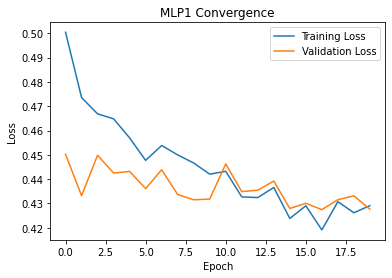

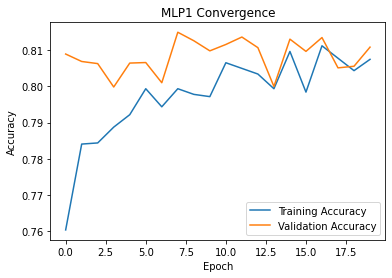

In [ ]:
# plot the convergence
plt.plot(training.history['loss'], label='Training Loss')
plt.plot(training.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('MLP1 Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(training.history['accuracy'], label='Training Accuracy')
plt.plot(training.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('MLP1 Convergence')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

##### Q7. Regardez la précision sur les données de validation

When running the learning algorithm several times, the initial weights of the neural network are randomized. Therefore, the final accuracy on the validation data can be different depending on the random initialization of the weights. These differences are usually small, but they can be significant in some cases, especially when the size of the dataset is small.

To reduce the impact of the random initialization, we can use techniques such as early stopping, weight initialization schemes, or regularization. In addition, it is also recommended to run several experiments with different random seeds to get a better understanding of the performance of the model.

##### Q8. Evaluez le modèle précédemment créé sur les données de test

In [ ]:
# Load the train_doc file
with open('mlp1.pickle', 'rb') as f:
    mlp1 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-05 21:27:38         2092
metadata.json                                  2023-03-05 21:27:38           64
variables.h5                                   2023-03-05 21:27:38       450752
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [ ]:
# Use the loaded model for prediction
ds_tst = ds_tst.batch(16).prefetch(16).cache()

As we could see from the test accuracy, we got a similar accuracy '0.79' compared with the train and validation test set, which means our model have a not bad performance.

In [ ]:
mlp1.evaluate(ds_tst)
out = mlp1.predict(ds_tst)

250/250 [==============================] - 1s 4ms/step


##### Q9. La prédiction fait une erreur de classification flagrante

I think the main reason for the wrong classification is that, this model is a relatively simple and naive modle. And we could see with the use of LSTM and BERT model below, our model's peference increase.

### LSTM avec apprentissage de représentation

#### Définition du vocabulaire

##### Q10. Ecrire une fonction normalize doc()

The function norm_doc takes in a document and returns a list of normalized tokens. It filters out unnecessary tokens such as punctuation, whitespace, brackets, and quotes, and then converts the remaining tokens to lowercase.

In [86]:
def norm_doc(doc):
    tokens = []
    for token in doc:
        # Filter out unnecessary tokens
        if token.is_punct or token.is_space or token.is_bracket or token.is_quote:
            continue
        # Normalize case
        tokens.append(token.text.lower())
    return tokens

##### Q11. En utilisant la normalisation ci-dessus

Here, we use the function we just defined in Q10 to perform doc normalizatoin. 



In [ ]:
from collections import Counter

# Normalize the training documents
norm = [norm_doc(doc) for doc in train_doc]

# Compile the list of tokens and their occurrences in the training data
token_counts = Counter()
for doc in norm:
    token_counts.update(doc)

print(token_counts)

Counter({'the': 131754, 'and': 65407, 'a': 64511, 'of': 58219, 'to': 54357, 'is': 44310, 'it': 37181, 'in': 37106, 'i': 33066, 'this': 29480, 'that': 29056, "'s": 24746, '/><br': 20377, 'was': 20103, 'as': 18214, 'for': 17508, 'with': 17407, 'movie': 17208, 'but': 16611, 'film': 15898, 'you': 13563, 'on': 13454, "n't": 13011, 'not': 12532, 'are': 12060, 'he': 11820, 'his': 11770, 'have': 11373, 'be': 10741, 'one': 10343, 'all': 9480, 'at': 9194, 'they': 8990, 'by': 8893, 'an': 8537, 'who': 8395, 'from': 8195, 'like': 8040, 'so': 7855, 'her': 7359, 'just': 7153, 'or': 7044, 'there': 6996, 'do': 6864, 'about': 6809, 'has': 6781, 'out': 6611, 'what': 6179, 'if': 6173, 'some': 6140, 'good': 5846, 'when': 5639, 'she': 5596, 'more': 5586, 'very': 5544, 'would': 5369, 'up': 5280, 'no': 5004, 'can': 4936, 'even': 4889, 'my': 4843, 'which': 4814, 'time': 4793, 'story': 4735, 'only': 4691, 'were': 4567, 'really': 4552, 'had': 4532, 'see': 4516, 'their': 4478, 'me': 4301, 'we': 4162, 'did': 4144,

##### Q12. Avec les 10000 tokens les plus fréquents une table de hashage

The code below is for creating a hash table mapping tokens to integers. It starts by looping over the training documents and updating a counter object with the token counts. 

Then, it selects the top 10,000 most common tokens from the counter and creates a mapping dictionary that assigns unique integer IDs to each token. 

In [ ]:
for doc in train_doc:
    token_counts.update(doc)

# Select the top 10,000 most common tokens
most_common_tokens = [token for token, count in token_counts.most_common(10000)]

# Create hash table mapping tokens to integers
mapping = {'': 0, '<unk>': 1}
for i, token in enumerate(most_common_tokens, start=2):
    mapping[token] = i

print(mapping)

{'': 0, '<unk>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'it': 8, 'in': 9, 'i': 10, 'this': 11, 'that': 12, "'s": 13, '/><br': 14, 'was': 15, 'as': 16, 'for': 17, 'with': 18, 'movie': 19, 'but': 20, 'film': 21, 'you': 22, 'on': 23, "n't": 24, 'not': 25, 'are': 26, 'he': 27, 'his': 28, 'have': 29, 'be': 30, 'one': 31, 'all': 32, 'at': 33, 'they': 34, 'by': 35, 'an': 36, 'who': 37, 'from': 38, 'like': 39, 'so': 40, 'her': 41, 'just': 42, 'or': 43, 'there': 44, 'do': 45, 'about': 46, 'has': 47, 'out': 48, 'what': 49, 'if': 50, 'some': 51, 'good': 52, 'when': 53, 'she': 54, 'more': 55, 'very': 56, 'would': 57, 'up': 58, 'no': 59, 'can': 60, 'even': 61, 'my': 62, 'which': 63, 'time': 64, 'story': 65, 'only': 66, 'were': 67, 'really': 68, 'had': 69, 'see': 70, 'their': 71, 'me': 72, 'we': 73, 'did': 74, 'does': 75, 'well': 76, 'than': 77, 'could': 78, 'much': 79, 'been': 80, 'people': 81, 'get': 82, 'other': 83, 'because': 84, 'will': 85, 'into': 86, 'great': 87, 'also': 88

#### Création des Dataset


##### Q13. Regardez rapidement la longueur des séquences normalisées

Then we compute the length of each normalized document in the training set and creates a histogram to visualize the distribution of sequence lengths. 

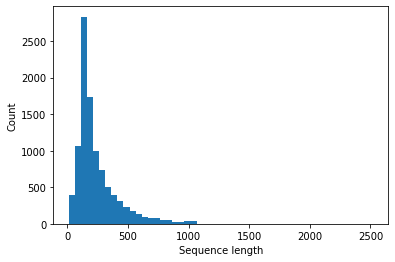

In [ ]:
# Compute sequence lengths for training documents
seq_lengths = [len(norm_doc(doc)) for doc in train_doc]

# Visualize distribution of sequence lengths
plt.hist(seq_lengths, bins=50)
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.show()

#####  Q14. Fonction qui prend en entrée une séquence normalisée de tokens

Then we define a function called **encode_sequence** that takes in a sequence of tokens, a mapping of tokens to integers, and a maximum sequence length.

The function first maps each token to its corresponding integer using the provided mapping, and then pads or truncates the resulting sequence to the fixed length specified by **max_seq_length** using the pad_sequences function from Keras.

In [ ]:
# Define function to encode sequence of tokens
def encode_sequence(tokens, mapping, max_seq_length):
    # Map tokens to integers
    encoded = [mapping.get(token, 1) for token in tokens]
    
    # Pad or truncate sequence to fixed length
    padded = tf.keras.preprocessing.sequence.pad_sequences([encoded], maxlen=max_seq_length, padding='post', truncating='post')
    return padded[0]

#####  Q15. En adaptant ce que vous avez vu dans la première partie

In the following code, the dataset is being prepared for training and validation. The batch size is set to 64, and the maximum sequence length is computed by finding the length of the longest document in the training set. The data is shuffled, and the dataset is split into training and validation sets using an 80/20 split. 

In [ ]:
import random
# Define batch size
batch_size = 64

# Compute maximum sequence length
max_seq_length = max(len(doc) for doc in train_doc)

# Shuffle the dataset
tf.random.set_seed(42)
data = [(doc, label) for doc, label in zip(train_doc, train_label)]
random.shuffle(data)

# Split the dataset into training and validation sets
split_idx = int(len(data) * 0.8)
trn_data, val_data = data[:split_idx], data[split_idx:]

# Unpack train and validation data
trn_docs, trn_labels = zip(*trn_data)
val_docs, val_labels = zip(*val_data)

# Normalize documents
trn_norm = [norm_doc(doc) for doc in trn_docs]
val_norm = [norm_doc(doc) for doc in val_docs]

In [ ]:
# Normalize test documents
test_norm = [norm_doc(doc) for doc in test_doc]

In [ ]:
# Save the processed norm data
with open('train_norm.pickle', 'wb') as f:
    pickle.dump(trn_norm, f)

# Save the processed norm data
with open('val_norm.pickle', 'wb') as f:
    pickle.dump(val_norm, f)

After that, we encode the normalized documents in the dataset using the **encode_sequence()** function that converts the tokens in each document to integers based on the mapping generated earlier. The encoded sequences are then padded or truncated to a fixed length using the pad_sequences() function from the Keras preprocessing module. 

In [ ]:
# Encode documents in training set
X_trn = [encode_sequence(doc, mapping, max_seq_length) for doc in trn_norm]
y_trn = np.array([0 if label == 'neg' else 1 for label in trn_labels])
y_trn = tf.keras.utils.to_categorical(y_trn, num_classes=2)

# Encode documents in validation set
X_val = [encode_sequence(doc, mapping, max_seq_length) for doc in val_norm]
y_val = np.array([0 if label == 'neg' else 1 for label in val_labels])
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Create TensorFlow Datasets
trn_tf = tf.data.Dataset.from_tensor_slices((X_trn, y_trn))
trn_tf = trn_tf.batch(batch_size)

val_tf = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_tf = val_tf.batch(batch_size)

In [ ]:
# Encode documents in training set
X_tst = [encode_sequence(doc, mapping, max_seq_length) for doc in test_norm]
y_tst = np.array([0 if label == 'neg' else 1 for label in test_label])
y_tst = tf.keras.utils.to_categorical(y_tst, num_classes=2)

# Create TensorFlow Datasets
tst_tf = tf.data.Dataset.from_tensor_slices((X_tst, y_tst))
tst_tf = tst_tf.batch(batch_size)

In [ ]:
tf.data.experimental.save(trn_tf, 'trn_tf')
tf.data.experimental.save(val_tf, 'val_tf')

Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


#####  Q16. Vérifiez sur quelques échantillons des données d’apprentissage

Then we encode the preprocessed documents using the token-to-integer mapping created earlier and check the first 5 records.

In [ ]:
check = [encode_sequence(doc, mapping, max_seq_length) for doc in norm]
check[:5]

[array([17,  4, 19, ...,  0,  0,  0], dtype=int32),
 array([1074,  202,   19, ...,    0,    0,    0], dtype=int32),
 array([   4, 1101,   50, ...,    0,    0,    0], dtype=int32),
 array([ 8, 13,  4, ...,  0,  0,  0], dtype=int32),
 array([ 22, 239,  32, ...,   0,   0,   0], dtype=int32)]

#### Défintion du modèle

#####  Q17. Créez un premier modèle à partir de l’exemple ci-dessus

With the instruction code provided,  it takes a long time to train the model, I create a small version of it.

This model have only one LSTM layer with a smaller dimension of 16, followed by two dense layers with 8 and 2 units respectively. 

We use thee summary() method provided by Keras to compute the number of parameters for each layer in the LSTM lodel ,and we could see we have over 162K parameters.

In [ ]:
trn_tf = tf.data.experimental.load('trn_tf')
val_tf = tf.data.experimental.load('val_tf')

Instructions for updating:
Use `tf.data.Dataset.load(...)` instead.


In [ ]:
vocsize = 10002
dim = 16
lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocsize, output_dim=dim, mask_zero=True),
    tf.keras.layers.LSTM(dim,dropout=0.5),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [ ]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160032    
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 162,298
Trainable params: 162,298
Non-trainable params: 0
_________________________________________________________________


#####  Q18. Lancez l’estimation des paramètres de votre modèle

Here we use the model we just created and the prepared data to train our lstm model.

In [ ]:
from keras.callbacks import EarlyStopping
# define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# compile the model
lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = lstm.fit(trn_tf, epochs=5, validation_data=val_tf, callbacks=[early_stop])

Epoch 1/5
125/125 [==============================] - 350s 3s/step - loss: 0.6898 - accuracy: 0.5307 - val_loss: 0.6650 - val_accuracy: 0.7120
Epoch 2/5
125/125 [==============================] - 339s 3s/step - loss: 0.5811 - accuracy: 0.7153 - val_loss: 0.4541 - val_accuracy: 0.8215
Epoch 3/5
125/125 [==============================] - 341s 3s/step - loss: 0.4008 - accuracy: 0.8188 - val_loss: 0.3172 - val_accuracy: 0.8635
Epoch 4/5
125/125 [==============================] - 352s 3s/step - loss: 0.3069 - accuracy: 0.8674 - val_loss: 0.4521 - val_accuracy: 0.8330
Epoch 5/5
125/125 [==============================] - 355s 3s/step - loss: 0.2689 - accuracy: 0.8773 - val_loss: 0.3543 - val_accuracy: 0.8670


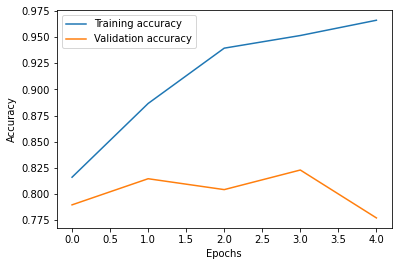

In [ ]:
# plot the training and validation accuracy over epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

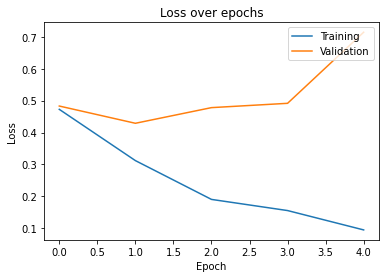

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Save the trained model to a file
with open('lstm.pickle', 'wb') as f:
    pickle.dump(lstm, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-05 22:49:38         2793
metadata.json                                  2023-03-05 22:49:38           64
variables

#####  Q19. Evaluez ces performances sur les données de test

Here presents the test accuracy result of LSTM model, as we could see from the results below, compared with our revious model, the LSTM model has a better performance.

In [ ]:
# Load the saved model from file
with open('lstm.pickle', 'rb') as f:
    lstm = pickle.load(f)

test_loss, test_acc = lstm.evaluate(tst_tf)
print("Test accuracy:", test_acc)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-05 22:49:38         2793
metadata.json                                  2023-03-05 22:49:38           64
variables.h5                                   2023-03-05 22:49:38      1979920
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
..

### Adaptation à la tâche d’un modèle BERT

#### Préparation des données

##### Q20. Créer la liste des textes au format ci-dessus pour l’apprentissage

In [ ]:
!pip install transformers
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.0 MB/s eta 0:00:00


Then the same, we use the train_test_split function from scikit-learn library to split the training data into training and validation sets with a 80/20 split. The training and validation texts and their corresponding labels are then separated into four different lists. 

In [ ]:
from sklearn.model_selection import train_test_split

trn_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# for efficient spaCy processing, we need to put text into a list so we can pipe()
trn_text = [x[1] for x in trn_data]
trn_label = [x[0] for x in trn_data]

val_text = [x[1] for x in val_data]
val_label = [x[0] for x in val_data]

tst_text = [x[1] for x in test_data]
tst_label = [x[0] for x in test_data]

##### Q21. Créer les Dataset correspondant aux données d’apprentissage

Then, we use tokenizer to take the trn_text as input, and returns a dictionary containing the encoded text along with various attributes resulting from tokenization such as attention_mask and input_ids.

The trn_encodings variable stores these dictionaries, and trn_bert is a TensorFlow dataset created from the tensor slices of the trn_encodings and trn_label.

In [ ]:
# Tokenize the texts
trn_encodings = tokenizer(trn_text, truncation=True, padding=True)
trn_bert = tf.data.Dataset.from_tensor_slices((dict(trn_encodings), trn_label))

In [ ]:
print(trn_encodings[0]) # pour voir les attributs issus de la tokenisation 
print(trn_text[0]) # liste des tokens pour le 1er texte 
print(trn_encodings[0].tokens) # liste après tokenisation

Encoding(num_tokens=512, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
What the hell is this? Its one of the dumbest movies I've seen. I don't understand why people on this site love it so much. Its senseless &nudity for no reason. Its worst then Resident Evil. I strongly don't recomend it unless you want to watch chessy, bad acting crap. Watch real horor movies such as Stephen King's It, The Shining, Jurassic Park(kinda horor), JAWS, etc. Leave this crap for a rental when there is nothing else to rent. It is bad as Crudy vs Gayson. Attack of the Killer Tomatoes is better then this crap.<br /><br />Oh wow flesh eating zombies. How many damn zobie movies do we need. SKip this one.<br /><br />* outta ****
['[CLS]', 'what', 'the', 'hell', 'is', 'this', '?', 'its', 'one', 'of', 'the', 'dumb', '##est', 'movies', 'i', "'", 've', 'seen', '.', 'i', 'don', "'", 't', 'understand', 'why', 'people', 'on', 'this', 'site', 'love', 'it', 'so', 'much', 

In [ ]:
# Tokenize the val data
val_encodings = tokenizer(val_text, truncation=True, padding=True)
val_bert = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_label))

# Tokenize the tst data
tst_encodings = tokenizer(tst_text, truncation=True, padding=True)
tst_bert = tf.data.Dataset.from_tensor_slices((dict(tst_encodings), tst_label))

In [ ]:
type(trn_bert)

tensorflow.python.data.ops.from_tensor_slices_op.TensorSliceDataset

#### Chargement du modèle et apprentissage

##### Q20. Regarder sa structure ainsi que le nombre de paramètres

Then we define our BERT model with the pre-trained DistilBERT model for sequence classification from the Hugging Face Transformers library.

In [ ]:
from transformers import TFDistilBertForSequenceClassification
bert = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# check the model's structure and number of parameters
bert.summary()
bert.count_params()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_20', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_20 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


66955010

##### Q21. Lancer l’adaptation du modèle sur une ou deux itérations

In [ ]:
# Specify the optimization method and learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

# Compile the model with binary cross-entropy loss
bert.compile(optimizer=optimizer, loss='binary_crossentropy')

In [ ]:
# Train the model for one or two iterations and check convergence as before
history = bert.fit(trn_bert, epochs=2,validation_data=val_bert)

##### Q22. Evaluer enfin la performance du modèle sur les données de test

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = bert.evaluate(test_text, test_label)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

## Partie 2. Etiquetage de séquences

##### Q23. Regardez le format et la signification des différentes colonnes

In [ ]:
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-trn.txt
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-val.txt
!wget http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-tst.txt

--2023-03-17 10:04:28--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-trn.txt
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3283420 (3.1M) [text/plain]
Saving to: ‘conll03-trn.txt’

conll03-trn.txt     100%[===================>]   3.13M  1.98MB/s    in 1.6s    

2023-03-17 10:04:31 (1.98 MB/s) - ‘conll03-trn.txt’ saved [3283420/3283420]

--2023-03-17 10:04:31--  http://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/conll03-val.txt
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 827443 (808K) [text/plain]
Saving to: ‘conll03-val.txt’

conll03-val.txt     100%[===================>] 808.05K   397KB/s    in 2.0s    

2023-03-17 10:04:33 (397 KB/s) - ‘conll03-

##### Q24. Ecrire une fonction qui lit un fichier et stock en mémoire les tokens

In [ ]:
def read_conll_file(fn, min_length=0):
    '''
    Read tagged data fron CONLL file.
    Returns a table of sequences of tokens with POS tags and IOB NER tags.
    '''
    data = []
    with open(fn, 'rt') as f:
        buf = []
        for line in f.readlines():
          
            if line.find('DOCSTART') != -1: continue
            
            if len(line) == 1:
                if len(buf) > 0:
                    if min_length == 0 or len(buf) >= min_length:
                        data.append(buf.copy())
                    buf = []
            else:
                # print(i, line.strip())
                a, b, c, d = line.strip().split()
                # print('     >>>>', a, d)
                buf.append((a,b,d))
    return data

Here we use the function provided to read the conll file. And print the first 5 records of the training data. As we could see from the output below, each sequence is a list of three_tuples, where the first element is the token, the second element is its POS tag and the third element is its label.

In [ ]:
conll_trn = read_conll_file("conll03-trn.txt")
conll_val = read_conll_file("conll03-val.txt")
conll_tst = read_conll_file("conll03-tst.txt")

print(conll_trn[0:5])

[[('EU', 'NNP', 'B-ORG'), ('rejects', 'VBZ', 'O'), ('German', 'JJ', 'B-MISC'), ('call', 'NN', 'O'), ('to', 'TO', 'O'), ('boycott', 'VB', 'O'), ('British', 'JJ', 'B-MISC'), ('lamb', 'NN', 'O'), ('.', '.', 'O')], [('Peter', 'NNP', 'B-PER'), ('Blackburn', 'NNP', 'I-PER')], [('BRUSSELS', 'NNP', 'B-LOC'), ('1996-08-22', 'CD', 'O')], [('The', 'DT', 'O'), ('European', 'NNP', 'B-ORG'), ('Commission', 'NNP', 'I-ORG'), ('said', 'VBD', 'O'), ('on', 'IN', 'O'), ('Thursday', 'NNP', 'O'), ('it', 'PRP', 'O'), ('disagreed', 'VBD', 'O'), ('with', 'IN', 'O'), ('German', 'JJ', 'B-MISC'), ('advice', 'NN', 'O'), ('to', 'TO', 'O'), ('consumers', 'NNS', 'O'), ('to', 'TO', 'O'), ('shun', 'VB', 'O'), ('British', 'JJ', 'B-MISC'), ('lamb', 'NN', 'O'), ('until', 'IN', 'O'), ('scientists', 'NNS', 'O'), ('determine', 'VBP', 'O'), ('whether', 'IN', 'O'), ('mad', 'JJ', 'O'), ('cow', 'NN', 'O'), ('disease', 'NN', 'O'), ('can', 'MD', 'O'), ('be', 'VB', 'O'), ('transmitted', 'VBN', 'O'), ('to', 'TO', 'O'), ('sheep', 'NN

##### Q25. Transformez les données de manière à pouvoir les utiliser 

Here I define several functions to build the token/label vocabularies, convert label strings to interger indices and convert token/label sequences to integer sequences. These functions are necessary to transform our data into propre format.

In [ ]:
# Step 1: Build token and label vocabularies
def build_vocab(data):
    token2idx = {"<PAD>": 0, "<UNK>": 1}
    label2idx = {"<PAD>": 0}
    for seq in data:
        for token in seq:
            if token[0] not in token2idx:
                token2idx[token[0]] = len(token2idx)
            if token[2] not in label2idx:
                label2idx[token[2]] = len(label2idx)
    return token2idx, label2idx

# Step 2: Convert label strings to integer indices
def label_to_idx(label, label2idx):
    if label in label2idx:
        return label2idx[label]
    else:
        return label2idx["<UNK>"]

# Step 3: Convert token and label sequences to integer sequences
def seq_to_idx(seq, token2idx, label2idx):
    token_ids = [token2idx.get(token[0], token2idx["<UNK>"]) for token in seq]
    label_ids = np.zeros((len(seq), len(label2idx)), dtype=np.int32)
    for i, token in enumerate(seq):
        label_ids[i, label_to_idx(token[2], label2idx)] = 1
    return token_ids, label_ids

In [ ]:
# Convert label sequences to integer sequences
def convert_labels(labels, label2idx):
    return [label_to_idx(label, label2idx) for label in labels]

# Convert data to integer sequences
def convert_data(data, token2idx, label2idx):
    X, y = [], []
    for seq in data:
        X.append([token2idx.get(token[0], token2idx["<UNK>"]) for token in seq])
        y.append(convert_labels([token[2] for token in seq], label2idx))
    return X, y

# Build vocabularies
token2idx, label2idx = build_vocab(conll_trn)

# Convert data to integer sequences
trn_X, trn_y = convert_data(conll_trn, token2idx, label2idx)
val_X, val_y = convert_data(conll_val, token2idx, label2idx)
tst_X, tst_y = convert_data(conll_tst, token2idx, label2idx)

The pad_sequence() function is applied on the 'x' and 'y' data, and the output 'y' is one-hot encoded useing the 'to_categorical' function. Also, 'maxlen' and 'ntangs' should be passed as arguments to the function.

In [ ]:
max_len = max(len(seq) for seq in trn_X)
trans = tf.keras.preprocessing.sequence.pad_sequences

# Pad sequences
trn_X = trans(trn_X, padding='post', maxlen=max_len, value=0)
val_X = trans(val_X, padding='post', maxlen=max_len, value=0)
tst_X = trans(tst_X, padding='post', maxlen=max_len, value=0)

# Transform labels to one-hot vectors
ntags = len(label2idx)
trn_y = trans(trn_y, padding='post', maxlen=max_len, value=0)
trn_y = tf.keras.utils.to_categorical(trn_y, num_classes=ntags)
val_y = trans(val_y, padding='post', maxlen=max_len, value=0)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=ntags)
tst_y = trans(tst_y, padding='post', maxlen=max_len, value=0)
tst_y = tf.keras.utils.to_categorical(tst_y, num_classes=ntags)

In [ ]:
# Print the shape of the transformed data
print("Shape of trn_X:", trn_X.shape)
print("Shape of trn_y:", trn_y.shape)

Shape of trn_X: (14041, 113)
Shape of trn_y: (14041, 113, 10)


##### Q26. Créez le modèle ner1 et lancez l’estimation des paramètres

In [ ]:
# Get maximum sequence length and number of unique tokens
maxlen = max(len(seq) for seq in trn_X)
ntokens = len(token2idx)
embed_dim = 50
lstm_dim = 100

ntags = len(label2idx)

ner1 = tf.keras.Sequential()
ner1.add(tf.keras.layers.InputLayer(input_shape=(maxlen,)))
ner1.add(tf.keras.layers.Embedding(input_dim=ntokens, output_dim=embed_dim, mask_zero=True))
ner1.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim, return_sequences=True)))
ner1.add(tf.keras.layers.Dropout(0.5))
ner1.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(ntags)))
ner1.add(tf.keras.layers.Activation('softmax'))

After defining the model architure, we compile the model by sepcifying the loss function, optimizer, and metrics. 

Then we start the training process by calling the 'fit' method on the model object, passing in the training and validation data, as well as the batch size and number of epochs to train for.

Finally, we evaluate the performance of the model on the test data by calling the 'evaluate' method on the model object, passing in the test data.

In [ ]:
# Compile the model
ner1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = ner1.fit(trn_X, trn_y, batch_size=128, epochs=10, validation_data=(val_X, val_y))

# Evaluate the model on the test data
test_loss, test_acc = ner1.evaluate(tst_X, tst_y)
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(test_loss, test_acc))

Epoch 1/10
110/110 [==============================] - 142s 1s/step - loss: 0.9786 - accuracy: 0.8246 - val_loss: 0.7124 - val_accuracy: 0.8322
Epoch 2/10
110/110 [==============================] - 118s 1s/step - loss: 0.4992 - accuracy: 0.8435 - val_loss: 0.4575 - val_accuracy: 0.8710
Epoch 3/10
110/110 [==============================] - 106s 962ms/step - loss: 0.3131 - accuracy: 0.8943 - val_loss: 0.3577 - val_accuracy: 0.8986
Epoch 4/10
110/110 [==============================] - 97s 886ms/step - loss: 0.2158 - accuracy: 0.9318 - val_loss: 0.2895 - val_accuracy: 0.9301
Epoch 5/10
110/110 [==============================] - 105s 956ms/step - loss: 0.1296 - accuracy: 0.9661 - val_loss: 0.2432 - val_accuracy: 0.9442
Epoch 6/10
110/110 [==============================] - 96s 872ms/step - loss: 0.0811 - accuracy: 0.9812 - val_loss: 0.2316 - val_accuracy: 0.9492
Epoch 7/10
110/110 [==============================] - 97s 886ms/step - loss: 0.0567 - accuracy: 0.9876 - val_loss: 0.2124 - val_accu

In [ ]:
# Save the trained model to a file
with open('ner1.pickle', 'wb') as f:
    pickle.dump(ner1, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dropout
.........vars
......embedding
.........vars
............0
......time_distributed
.........layer
............vars
...............0
...............1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........2
.........3
.........4
.........5
.........6

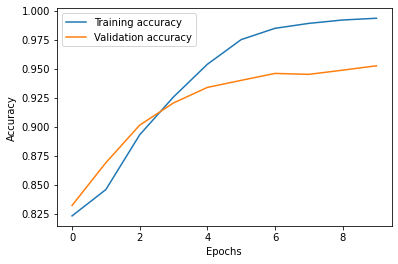

In [ ]:
# plot the training and validation accuracy over epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

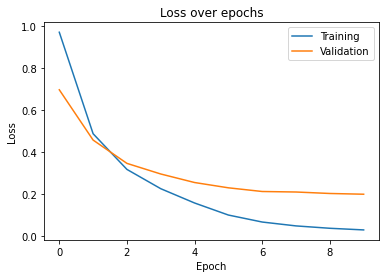

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

##### Q27. Décodez avec ce modèle les données de test de manière 

To decode with the model and retrive the prediction lables for each sequence in the test data, we use the 'predict()' method of the model.

In [ ]:
# Load the saved model from file
with open('ner1.pickle', 'rb') as f:
    ner1 = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-05 19:17:40         2739
metadata.json                                  2023-03-05 19:17:40           64
variables.h5                                   2023-03-05 19:17:40     15692456
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......activation
.........vars
......bidirectional
.........backward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........forward_layer
............cell
...............vars
..................0
..................1
..................2
............vars
.........layer
............cell
...............vars
............vars
.........vars
......dropout
.........vars
......embedding
.........vars
............0
......time_distributed
.........layer
............vars
...............0
...............1
.....

In [ ]:
# Decode test data
test_preds = ner1.predict(tst_X)

# Convert predictions to label sequences
test_pred_labels = []
idx2label = {v: k for k, v in label2idx.items()}

for i in range(len(test_preds)):
    pred_labels = []
    for j in range(len(test_preds[i])):
        pred_labels.append(idx2label[np.argmax(test_preds[i][j])])
    test_pred_labels.append(pred_labels)

108/108 [==============================] - 3s 4ms/step


Here, 'test_pred_labels' is a list of predicted label sequence where each label is represented as a string rather than a one-hot vector. 

##### Q28. Pourquoi ne peut-on pas utiliser directement la fonction evaluate

Because our input data needs to be transformed in a specific way to be fed into the model. Specially, out input data needs to be in the form of a sequence of tokens where each token is represented by a one-hot encoding vector, and our output data needs to be in the form of a sequence of labels where each labels is represented by a one-hot encoding vector.

##### Q29. Ecrivez une fonction qui calcul pour chacune des étiquettes

Here we define a function that calculate precisioin, recall and F1-score for each of labels B-* and I-* (* ∈ {LOC, PER, ORG, MISC}). 

The get_f1score function takes as input the true labels (test_labels) and predicted labels (pred_labels) and returns a list of tuples containing the precision, recall, and F1 score for each label and overall.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def get_f1score(test_labels, pred_labels):
    labels = ['B-LOC', 'I-LOC', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-MISC', 'I-MISC']
    results = []
    for label in labels:
        # Compute precision, recall, and F1 score for the current label
        p, r, f1, _ = precision_recall_fscore_support(test_labels == label, pred_labels == label, average='binary')
        results.append((label, p, r, f1))
    
    # Compute precision, recall, and F1 score across all labels
    p, r, f1, _ = precision_recall_fscore_support(test_labels, pred_labels, labels=labels, average='weighted')
    results.append(('Overall', p, r, f1))
    
    return results

Then we use this defined function as follows to print out a dictionary with all the metrics for each label and overall.

As we could see from the following output, we got a highest precision in B-PER label, while B-LOC has the highest recall and highest F1 score. Generally, we have the best prediction performance in B-LOC group.

In [ ]:
# Make predictions on the test data
pred_y = ner1.predict(tst_X).argmax(axis=-1)
pred_labels = [[list(label2idx.keys())[list(label2idx.values()).index(idx)] for idx in seq] for seq in pred_y]
test_labels = [[list(label2idx.keys())[list(label2idx.values()).index(idx)] for idx in seq] for seq in tst_y.argmax(axis=-1)]

# Compute precision, recall, and F1 score for each label and overall
results = get_f1score(np.array(test_labels).flatten(), np.array(pred_labels).flatten())

# Print the results
for label, p, r, f1 in results:
    print(f'{label} precision: {p:.2f}, recall: {r:.2f}, F1 score: {f1:.2f}')

108/108 [==============================] - 1s 6ms/step
B-LOC precision: 0.86, recall: 0.81, F1 score: 0.84
I-LOC precision: 0.40, recall: 0.72, F1 score: 0.51
B-PER precision: 0.92, recall: 0.50, F1 score: 0.65
I-PER precision: 0.86, recall: 0.51, F1 score: 0.64
B-ORG precision: 0.00, recall: 0.68, F1 score: 0.01
I-ORG precision: 0.72, recall: 0.64, F1 score: 0.68
B-MISC precision: 0.76, recall: 0.72, F1 score: 0.74
I-MISC precision: 0.54, recall: 0.60, F1 score: 0.56
Overall precision: 0.65, recall: 0.64, F1 score: 0.56
